# Fit the heirarchical models

Created 26/11/2020.  Refactoring from `refit_pooled_1` to clean up and streamline processing and data

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
from scipy import stats
import theano.tensor as tt

import data_handling as dh
import bee_util as bu
import models
import functions as ff
import indexTools
import pymc3_utils as pmu
import arviz as az

import importlib
importlib.reload(bu)
importlib.reload(ff)
importlib.reload(indexTools)
importlib.reload(dh)
importlib.reload(pmu)
importlib.reload(dh)
importlib.reload(models)

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Read in the data

In [2]:
from glob import glob
import os
files=sorted(glob("results_analyse/cont_*.csv"))+\
    sorted(glob('results_analyse/caged*.csv'))+\
    sorted(glob('results_analyse/banked*.csv'))

df = dh.read_data(files)

# add integer labels for the various groupings 
df['i_ind'],     df['ucode']   = indexTools.multilabel_encoder(df,'treat day rep string'.split())
df['i_treatday'],df['treatday']= indexTools.multilabel_encoder(df,'treat day'.split())
df['i_treat'],_                = indexTools.multilabel_encoder(df,'treat'.split())

In [3]:
importlib.reload(models)
ns_p1_mod = models.nurse_model_p1(df)

## Oocyte model
stored in `models.py`

In [4]:
oc_p1_mod = models.oocycte_model_p1(df)

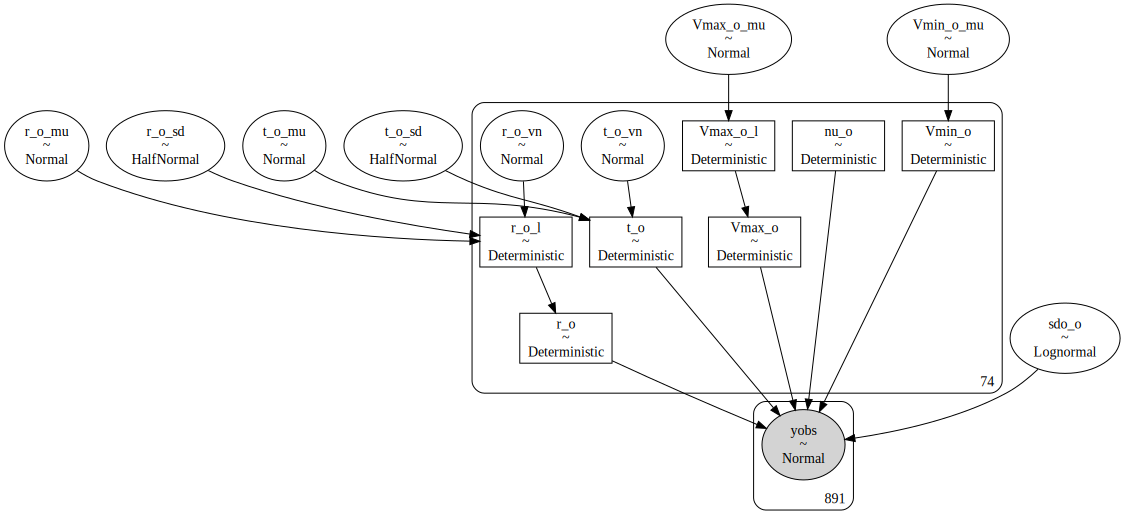

In [5]:
pm.model_to_graphviz(oc_p1_mod)

In [6]:
with oc_p1_mod:
    trace_oc_p1=pm.sample(start={'Vmax_o_mu':np.log(195)})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sdo_o, Vmin_o_mu, t_o_vn, t_o_sd, t_o_mu, r_o_vn, r_o_sd, r_o_mu, Vmax_o_mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 70 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [7]:
pm.save_trace(trace_oc_p1,"/Volumes/scratch/sarah/traces/trace_oc_p1",overwrite=True)

'/Volumes/scratch/sarah/traces/trace_oc_p1'

## Nurse model

In [8]:
ns_p1_mod = models.nurse_model_p1(df)

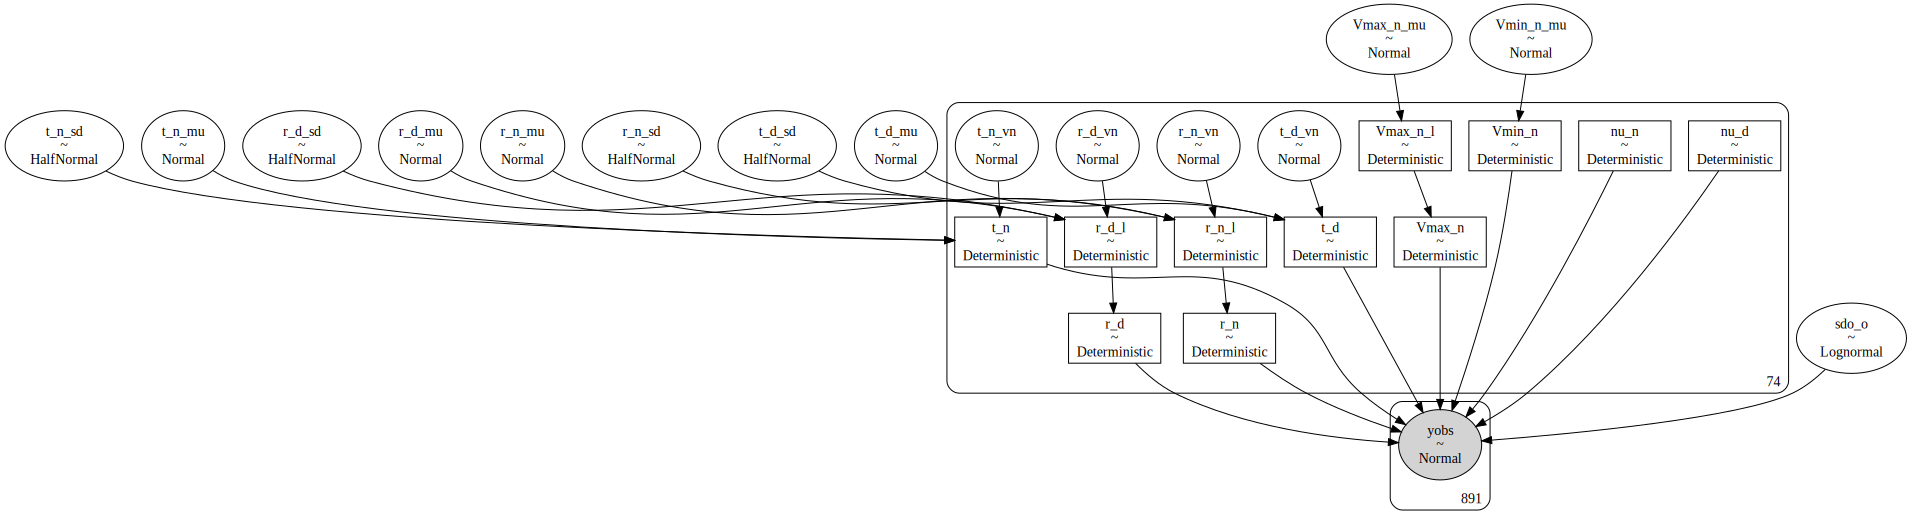

In [9]:
pm.model_to_graphviz(ns_p1_mod)

In [10]:
with ns_p1_mod:
    trace_ns_p1=pm.sample(start={'Vmax_n_mu':np.log(105)})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sdo_o, Vmin_n_mu, t_d_vn, t_d_sd, t_d_mu, r_d_vn, r_d_sd, r_d_mu, t_n_vn, t_n_sd, t_n_mu, r_n_vn, r_n_sd, r_n_mu, Vmax_n_mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 148 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


In [11]:
pm.save_trace(trace_ns_p1,"/Volumes/scratch/sarah/traces/trace_ns_p1",overwrite=True)

'/Volumes/scratch/sarah/traces/trace_ns_p1'